COAsT currently has two observation classes: `ALTIMETRY` and `TIDEGAUGE`. Each has it's own methods and, crucially, their own data formatting requirements. Here, we take a look at both and then do some model comparison.

Import packages and define files paths:

In [1]:
import coast
import datetime

fn_nemo_dat  = './example_files/COAsT_example_NEMO_data.nc'
fn_nemo_dom  = './example_files/COAsT_example_NEMO_domain.nc'
fn_tidegauge = './example_files/tide_gauges/dover-p012-uk-bodc'
fn_tidegauge_mult = './example_files/tide_gauges/*'
fn_altimetry = './example_files/COAsT_example_altimetry_data.nc'

## Altimetry
The `ALTIMETRY` class is for handling along-track data, especially from an altimeter instrument. By default it is set up to read along-track altimetry data from the CMEMS database.

Create `ALTIMETRY` object and plot the data using `ALTIMETRY.quick_plot()`:

In [2]:
altimetry = coast.ALTIMETRY(fn_altimetry)
altimetry.dataset

<xarray.Dataset>
Dimensions:         (t_dim: 52935)
Coordinates:
    time            (t_dim) datetime64[ns] 2006-12-31T23:16:07.575246336 ... ...
    longitude       (t_dim) float64 ...
    latitude        (t_dim) float64 ...
Dimensions without coordinates: t_dim
Data variables:
    cycle           (t_dim) int16 ...
    track           (t_dim) int16 ...
    dac             (t_dim) float32 ...
    lwe             (t_dim) float32 ...
    mdt             (t_dim) float32 ...
    ocean_tide      (t_dim) float64 ...
    sla_filtered    (t_dim) float32 ...
    sla_unfiltered  (t_dim) float32 ...
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea surface height measured by altimeter...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    creator_name:                    CMEMS - Sea Level Thematic Assembly Center
    creator_url:                     http://marine.copernicus.eu
    date_created:                    2019-02-20T11:20:56Z
    date_issued:                     2019-02-20T11:20:56Z
    date_modified:                   2019-02-20T11:20:56Z
    geospatial_lat_max:              66.14403899999999
    geospatial_lat_min:              -66.146283
    geospatial_lat_resolution:       0.006912999999997282
    geospatial_lat_units:            degrees_north
    geospatial_lon_max:              359.977066
    geospatial_lon_min:              0.002992
    geospatial_lon_resolution:       0.032640499999999406
    geospatial_lon_units:            degrees_east
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_positive:    down
    geospatial_vertical_resolution:  point
    geospatial_vertical_units:       m
    history:                         2019-02-20T11:20:56Z: Creation
    institution:                     CLS, CNES
    keywords:                        Oceans > Ocean Topography > Sea Surface ...
    keywords_vocabulary:             NetCDF COARDS Climate and Forecast Stand...
    license:                         http://marine.copernicus.eu/web/27-servi...
    platform:                        Jason-1
    processing_level:                L3
    product_version:                 2019
    project:                         COPERNICUS MARINE ENVIRONMENT MONITORING...
    references:                      http://marine.copernicus.eu
    software_version:                6.2_DUACS_DT2018_baseline
    source:                          Jason-1 measurements
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-3 sea su...
    time_coverage_duration:          P24H17M35.44591S
    time_coverage_end:               2007-01-01T23:33:42Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2006-12-31T23:16:07Z
    title:                           DT Jason-1 Global Ocean Along track SSAL...

Let's take a look at the `sla_filtered` variable using `quick_plot()`:

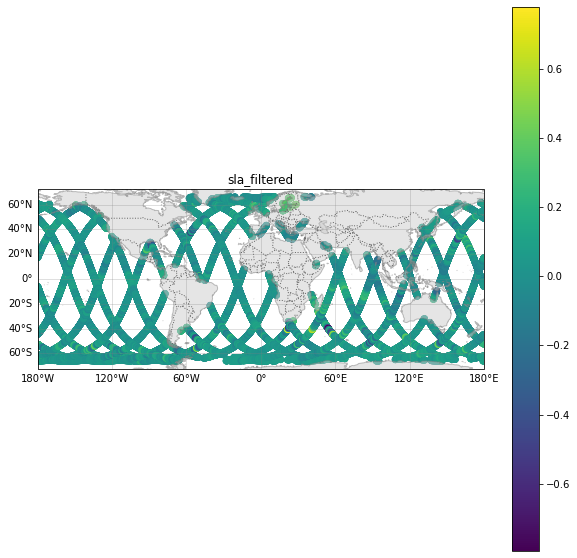

(<Figure size 720x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x15ca37f40>)

In [3]:
altimetry.quick_plot('sla_filtered')

Before going any further, lets just cut out the bit of the altimetry that is over the model domain. This can be done using `altimetry.subset_indices_lonlat_box()` to find relevant indices and then isel to extract them. The data has also been thinned slightly.

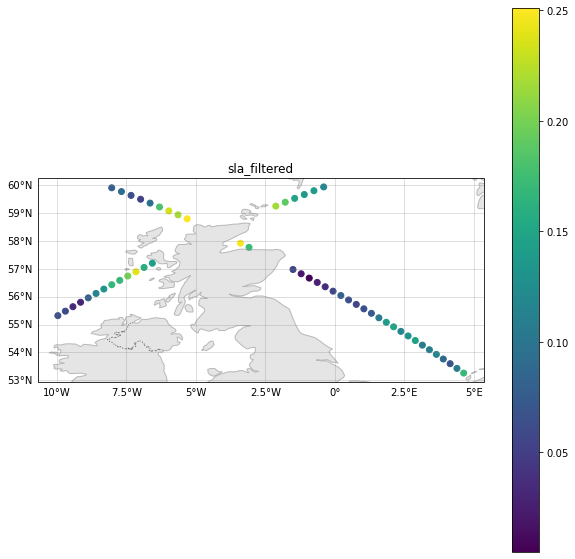

(<Figure size 720x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x15da91790>)

In [4]:
ind = altimetry.subset_indices_lonlat_box([-10,10], [45,60])
ind = ind[::4]
altimetry = altimetry.isel(t_dim=ind)
altimetry.quick_plot('sla_filtered')

## TIDEGAUGE

The `TIDEGAUGE` class is for handling time series data, specifically at a tide gauge. By default, it is set up to read GESLA2 data. 

Create tidegauge object and read data between two dates:

In [5]:
date0 = datetime.datetime(2007,1,1)
date1 = datetime.datetime(2007,1,31)
tidegauge = coast.TIDEGAUGE(fn_tidegauge, date_start = date0, date_end = date1)
tidegauge.dataset

<xarray.Dataset>
Dimensions:    (time: 2881)
Coordinates:
  * time       (time) datetime64[ns] 2007-01-01 ... 2007-01-31
Data variables:
    sea_level  (time) float64 3.568 3.361 3.141 2.914 ... 5.002 4.786 4.571
    qc_flags   (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
    longitude  float64 1.318
    latitude   float64 51.12
Attributes:
    site_name:            Dover
    country:              United_Kingdom
    contributor:          British_Oceanographic_Data_Centre
    coordinate_system:    UK
    original_start_date:  1924-01-01 00:00:00
    original_end_date:    2014-12-31 23:45:00
    time_zone_hours:      0.0
    precision:            0.001
    null_value:           -99.9999

TIDEGAUGE has ready made quick plotting routines for viewing time series and tide gauge location. To look at the tide gauge location:

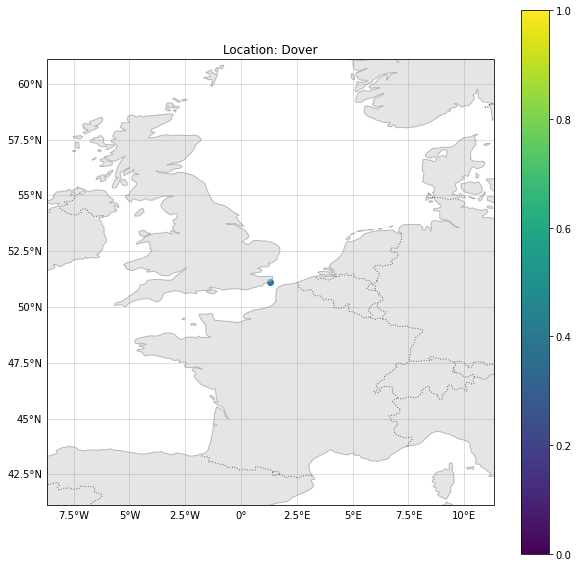

In [6]:
fig, ax = tidegauge.plot_on_map()

Or to look at a time series of the `sea_level` variable:

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x15d67fe20>)

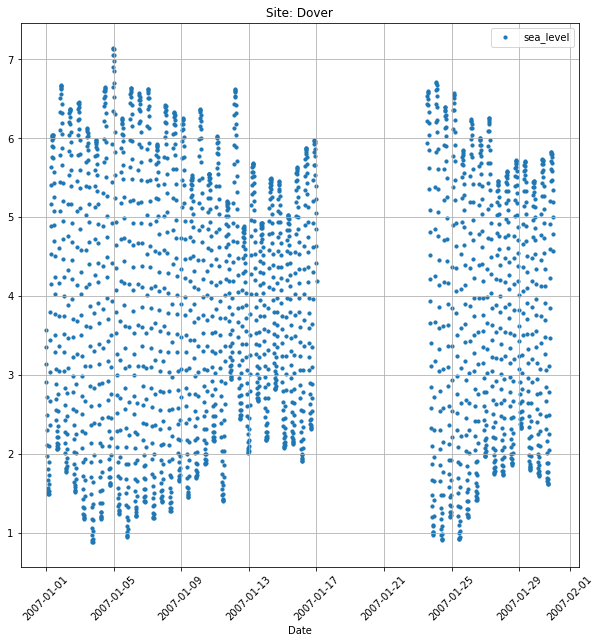

In [7]:
tidegauge.plot_timeseries('sea_level')

We can resample this data to 1 hour using an averaging window and apply a Doodson-x0 filter to remove some of the tides:

In [8]:
# Resample data
tidegauge.resample_mean('sea_level','1H')

# Apply Doodson x0 filter
tidegauge.apply_doodson_x0_filter('sea_level_1H')

The `resample_mean()` routine created a new variable inside `tidegauge` called `sea_level_1H`, which we then pass to `apply_doodson_x0_filter()`. This then creates a new variable called `sea_level_1H_dx0`. These can now be seen:

In [9]:
tidegauge.dataset

<xarray.Dataset>
Dimensions:           (time: 2881, time_1H: 721)
Coordinates:
  * time              (time) datetime64[ns] 2007-01-01 ... 2007-01-31
  * time_1H           (time_1H) datetime64[ns] 2007-01-01 ... 2007-01-31
Data variables:
    sea_level         (time) float64 3.568 3.361 3.141 ... 5.002 4.786 4.571
    qc_flags          (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    longitude         float64 1.318
    latitude          float64 51.12
    sea_level_1H      (time_1H) float64 3.246 2.407 1.757 ... 5.626 5.079 4.571
    sea_level_1H_dx0  (time_1H) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    site_name:            Dover
    country:              United_Kingdom
    contributor:          British_Oceanographic_Data_Centre
    coordinate_system:    UK
    original_start_date:  1924-01-01 00:00:00
    original_end_date:    2014-12-31 23:45:00
    time_zone_hours:      0.0
    precision:            0.001
    null_value:           -99.9999

And we can plot all three variables up using `plot_timeseries()`:

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x16332dd60>)

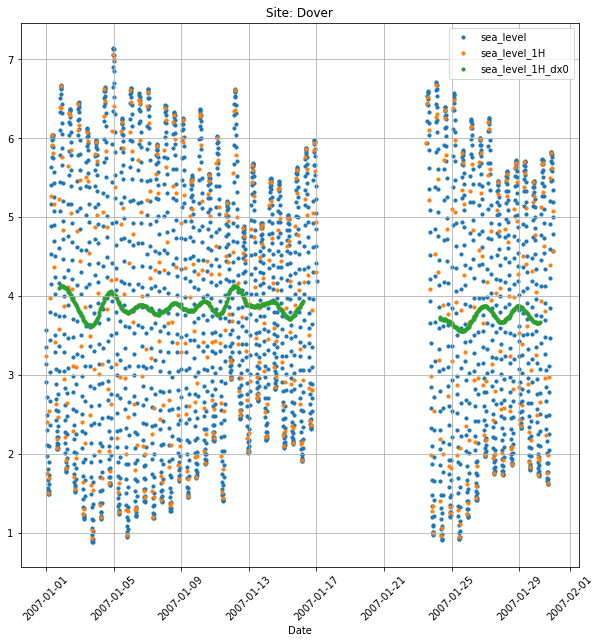

In [10]:
tidegauge.plot_timeseries(['sea_level', 'sea_level_1H', 'sea_level_1H_dx0'])

Each `TIDEGAUGE` object only holds data for a single tidegauge. There is some functionality for dealing with multiple gauges in COAsT. To load multiple GESLA tidegauge files, we use the static method `create_multiple_tidegauge()`. This routine takes a list of files or a wildcard string and loads them all into a list of `TIDEGAUGE` objects.

In [11]:
date0 = datetime.datetime(2007,1,10)
date1 = datetime.datetime(2007,1,12)
tidegauge_list = coast.TIDEGAUGE.create_multiple_tidegauge(fn_tidegauge_mult,
                                                            date0,date1)

Now that we have tidegauge_list, we can plot the locations of all tide gauges as follows:

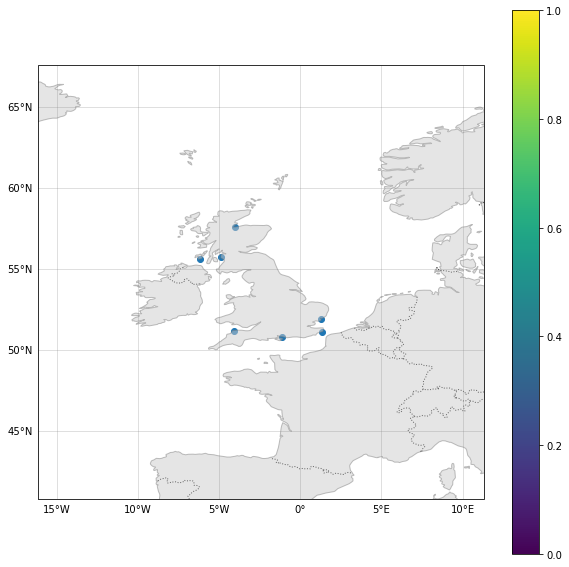

In [12]:
fig, ax = coast.TIDEGAUGE.plot_on_map_multiple(tidegauge_list)

## Model Comparison
COAsT contains some functionality for interpolating model data and comparing to observations.

Let's load in the NEMO data we defined above:

In [13]:
nemo_t = coast.NEMO(fn_nemo_dat, fn_nemo_dom, grid_ref='t-grid', chunks={})

Before comparing our observations to the model, we will interpolate a model variable to the same time and geographical space as the tidegauge. This is done using the `obs_operator()` method. At the moment, this finds the nearest grid cell to each observation and interpolates in time using any `scipy` interpolation method.

In [14]:
tidegauge.obs_operator(nemo_t, mod_var_name='ssh', time_interp='nearest')
tidegauge.dataset

<xarray.Dataset>
Dimensions:           (time: 2881, time_1H: 721)
Coordinates:
  * time              (time) datetime64[ns] 2007-01-01 ... 2007-01-31
  * time_1H           (time_1H) datetime64[ns] 2007-01-01 ... 2007-01-31
Data variables:
    sea_level         (time) float64 3.568 3.361 3.141 ... 5.002 4.786 4.571
    qc_flags          (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    longitude         float64 1.318
    latitude          float64 51.12
    sea_level_1H      (time_1H) float64 3.246 2.407 1.757 ... 5.626 5.079 4.571
    sea_level_1H_dx0  (time_1H) float64 nan nan nan nan nan ... nan nan nan nan
    interp_ssh        (time) float32 dask.array<chunksize=(2881,), meta=np.ndarray>
Attributes:
    site_name:            Dover
    country:              United_Kingdom
    contributor:          British_Oceanographic_Data_Centre
    coordinate_system:    UK
    original_start_date:  1924-01-01 00:00:00
    original_end_date:    2014-12-31 23:45:00
    time_zone_hours:      0.0
    precision:            0.001
    null_value:           -99.9999

And similarly for altimetry:

In [15]:
altimetry.obs_operator(nemo_t, mod_var_name = 'ssh', time_interp = 'nearest')
altimetry.dataset

<xarray.Dataset>
Dimensions:         (t_dim: 54)
Coordinates:
    time            (t_dim) datetime64[ns] 2007-01-01T05:39:29.349092096 ... ...
    longitude       (t_dim) float64 350.0 350.3 350.6 ... 4.146 4.391 4.633
    latitude        (t_dim) float64 55.32 55.48 55.64 55.8 ... 53.59 53.42 53.25
Dimensions without coordinates: t_dim
Data variables:
    cycle           (t_dim) int16 183 183 183 183 183 ... 183 183 183 183 183
    track           (t_dim) int16 189 189 189 189 189 ... 196 196 196 196 196
    dac             (t_dim) float32 0.0852 0.0902 0.0898 ... 0.4511 0.475 0.5175
    lwe             (t_dim) float32 -0.022000002 -0.022000002 ... -0.004 -0.004
    mdt             (t_dim) float32 -0.071 -0.068 -0.065000005 ... 0.039 0.043
    ocean_tide      (t_dim) float64 0.5937 0.6157 0.6353 ... -0.5664 -0.5707
    sla_filtered    (t_dim) float32 0.063999996 0.06 0.033 ... 0.106 0.17
    sla_unfiltered  (t_dim) float32 0.11400001 0.079 -0.015000001 ... 0.063 0.17
    interp_ssh      (t_dim) float32 dask.array<chunksize=(54,), meta=np.ndarray>
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea surface height measured by altimeter...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    creator_name:                    CMEMS - Sea Level Thematic Assembly Center
    creator_url:                     http://marine.copernicus.eu
    date_created:                    2019-02-20T11:20:56Z
    date_issued:                     2019-02-20T11:20:56Z
    date_modified:                   2019-02-20T11:20:56Z
    geospatial_lat_max:              66.14403899999999
    geospatial_lat_min:              -66.146283
    geospatial_lat_resolution:       0.006912999999997282
    geospatial_lat_units:            degrees_north
    geospatial_lon_max:              359.977066
    geospatial_lon_min:              0.002992
    geospatial_lon_resolution:       0.032640499999999406
    geospatial_lon_units:            degrees_east
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_positive:    down
    geospatial_vertical_resolution:  point
    geospatial_vertical_units:       m
    history:                         2019-02-20T11:20:56Z: Creation
    institution:                     CLS, CNES
    keywords:                        Oceans > Ocean Topography > Sea Surface ...
    keywords_vocabulary:             NetCDF COARDS Climate and Forecast Stand...
    license:                         http://marine.copernicus.eu/web/27-servi...
    platform:                        Jason-1
    processing_level:                L3
    product_version:                 2019
    project:                         COPERNICUS MARINE ENVIRONMENT MONITORING...
    references:                      http://marine.copernicus.eu
    software_version:                6.2_DUACS_DT2018_baseline
    source:                          Jason-1 measurements
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-3 sea su...
    time_coverage_duration:          P24H17M35.44591S
    time_coverage_end:               2007-01-01T23:33:42Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2006-12-31T23:16:07Z
    title:                           DT Jason-1 Global Ocean Along track SSAL...

Doing this has created a new interpolated variable called interp_ssh and saved it back into our TIDEGAUGE object. Take a look at tidegauge.dataset to see for yourself.

Next we will compare this interpolated variable to an observed variable using some basic metrics. The basic_stats() routine can be used for this, which calculates some simple metrics including differences, RMSE and correlations. NOTE: This may not be a wise choice of variables.

In [16]:
altimetry_stats = altimetry.basic_stats('interp_ssh', 'sla_filtered')
altimetry_stats.dataset

<xarray.Dataset>
Dimensions:         (t_dim: 54)
Coordinates:
    longitude       (t_dim) float64 350.0 350.3 350.6 ... 4.146 4.391 4.633
    latitude        (t_dim) float64 55.32 55.48 55.64 55.8 ... 53.59 53.42 53.25
    time            (t_dim) datetime64[ns] 2007-01-01T05:39:29.349092096 ... ...
Dimensions without coordinates: t_dim
Data variables:
    absolute_error  (t_dim) float32 0.054164067 0.05230469 ... 0.49308592
    error           (t_dim) float32 0.054164067 0.05230469 ... 0.49308592
    mae             float32 0.2203102
    rmse            float32 0.25374767
    corr            float64 0.7311
    cov             float64 246.1
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea surface height measured by altimeter...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    creator_name:                    CMEMS - Sea Level Thematic Assembly Center
    creator_url:                     http://marine.copernicus.eu
    date_created:                    2019-02-20T11:20:56Z
    date_issued:                     2019-02-20T11:20:56Z
    date_modified:                   2019-02-20T11:20:56Z
    geospatial_lat_max:              66.14403899999999
    geospatial_lat_min:              -66.146283
    geospatial_lat_resolution:       0.006912999999997282
    geospatial_lat_units:            degrees_north
    geospatial_lon_max:              359.977066
    geospatial_lon_min:              0.002992
    geospatial_lon_resolution:       0.032640499999999406
    geospatial_lon_units:            degrees_east
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_positive:    down
    geospatial_vertical_resolution:  point
    geospatial_vertical_units:       m
    history:                         2019-02-20T11:20:56Z: Creation
    institution:                     CLS, CNES
    keywords:                        Oceans > Ocean Topography > Sea Surface ...
    keywords_vocabulary:             NetCDF COARDS Climate and Forecast Stand...
    license:                         http://marine.copernicus.eu/web/27-servi...
    platform:                        Jason-1
    processing_level:                L3
    product_version:                 2019
    project:                         COPERNICUS MARINE ENVIRONMENT MONITORING...
    references:                      http://marine.copernicus.eu
    software_version:                6.2_DUACS_DT2018_baseline
    source:                          Jason-1 measurements
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-3 sea su...
    time_coverage_duration:          P24H17M35.44591S
    time_coverage_end:               2007-01-01T23:33:42Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2006-12-31T23:16:07Z
    title:                           DT Jason-1 Global Ocean Along track SSAL...

Take a look inside `altimetry_stats.dataset` to see all of the new variables. When using `basic stats`, the returned object is also an `TIDEGAUGE` object, so all of the same methods can be applied. Alternatively, if you want to save the new metrics to the original `TIDEGAUGE` object, set `create_new_object = False`.

Now we will do a more complex comparison using the Continuous Ranked Probability Score (CRPS). For this, we need to hand over the model object, a model variable and an observed variable. We also give it a neighbourhood radius in km (nh_radius).

In [17]:
crps = altimetry.crps(nemo_t, model_var_name = 'ssh', obs_var_name = 'sla_filtered', nh_radius = 25)

Again, take a look inside crps.dataset to see some new variables. Similarly to basic_stats, create_new_object can be set to false to save output to the original tidegauge object.

In [18]:
crps.dataset

<xarray.Dataset>
Dimensions:             (t_dim: 54)
Coordinates:
    longitude           (t_dim) float64 350.0 350.3 350.6 ... 4.146 4.391 4.633
    latitude            (t_dim) float64 55.32 55.48 55.64 ... 53.59 53.42 53.25
    time                (t_dim) datetime64[ns] 2007-01-01T05:39:29.349092096 ...
Dimensions without coordinates: t_dim
Data variables:
    crps                (t_dim) float64 0.04747 0.05339 ... 0.4706 0.4635
    crps_n_model_pts    (t_dim) float64 38.0 39.0 36.0 39.0 ... 36.0 32.0 36.0
    crps_contains_land  (t_dim) bool False False False ... False False True
Attributes:
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea surface height measured by altimeter...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    creator_name:                    CMEMS - Sea Level Thematic Assembly Center
    creator_url:                     http://marine.copernicus.eu
    date_created:                    2019-02-20T11:20:56Z
    date_issued:                     2019-02-20T11:20:56Z
    date_modified:                   2019-02-20T11:20:56Z
    geospatial_lat_max:              66.14403899999999
    geospatial_lat_min:              -66.146283
    geospatial_lat_resolution:       0.006912999999997282
    geospatial_lat_units:            degrees_north
    geospatial_lon_max:              359.977066
    geospatial_lon_min:              0.002992
    geospatial_lon_resolution:       0.032640499999999406
    geospatial_lon_units:            degrees_east
    geospatial_vertical_max:         0.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_positive:    down
    geospatial_vertical_resolution:  point
    geospatial_vertical_units:       m
    history:                         2019-02-20T11:20:56Z: Creation
    institution:                     CLS, CNES
    keywords:                        Oceans > Ocean Topography > Sea Surface ...
    keywords_vocabulary:             NetCDF COARDS Climate and Forecast Stand...
    license:                         http://marine.copernicus.eu/web/27-servi...
    platform:                        Jason-1
    processing_level:                L3
    product_version:                 2019
    project:                         COPERNICUS MARINE ENVIRONMENT MONITORING...
    references:                      http://marine.copernicus.eu
    software_version:                6.2_DUACS_DT2018_baseline
    source:                          Jason-1 measurements
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    summary:                         SSALTO/DUACS Delayed-Time Level-3 sea su...
    time_coverage_duration:          P24H17M35.44591S
    time_coverage_end:               2007-01-01T23:33:42Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2006-12-31T23:16:07Z
    title:                           DT Jason-1 Global Ocean Along track SSAL...

This can be treated as the same class as the original observation object, so in this case `ALTIMETRY`. So we can do some plotting using `quick_plot()`:

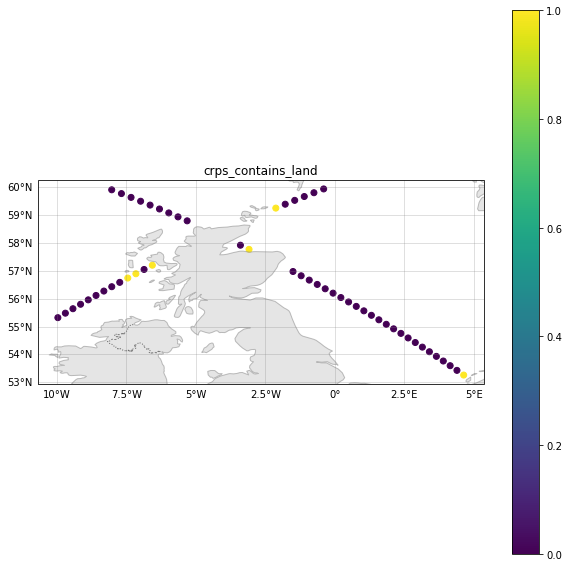

(<Figure size 720x720 with 2 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x15d432fa0>)

In [19]:
crps.quick_plot('crps_contains_land')

You can use numpy to get an average CRPS over the domain:

In [20]:
import numpy as np
np.nanmean( crps.dataset.crps )

0.21334061836707338